# Zestaw zadań: Równania różniczkowe zywczajne
## Zadanie 3
### Autor: Artur Gęsiarz

In [464]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [465]:
import warnings
warnings.filterwarnings("ignore")

### Parametry modelu

In [466]:
beta = 1.0
gamma = 1.0 / 7.0

### Warunki początkowe

In [467]:
S0 = 762
I0 = 1
R0 = 0
N = S0 + I0 + R0

### Czas

In [468]:
t_span = (0, 14)
t_eval = np.arange(0, 14.2, 0.2)

### Funkcja opisująca model SIR

In [469]:
def sir_model(t, y, beta, gamma):
    S, I, R = y
    dSdt = np.array(-beta / N * I * S)
    dIdt = np.array(beta / N * I * S - gamma * I)
    dRdt = np.array(gamma * I)
    return np.array([dSdt, dIdt, dRdt])

### Metoda jawna Eulera

In [470]:
def euler_method(f, t_span, y0, h, beta, gamma):
    t0, tf = t_span
    t = np.arange(t0, tf + h, h)
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0

    for i in range(n - 1):
        y[i + 1] = y[i] + h * np.array(f(t[i], y[i], beta, gamma))

    return t, y

### Metoda niejawna Eulera

In [471]:
def implicit_euler_method(f, t_span, y0, h, beta, gamma):
    t0, tf = t_span
    t = np.arange(t0, tf + h, h)
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0

    for i in range(n - 1):
        y_pred = y[i] + h * np.array(f(t[i], y[i], beta, gamma))
        y[i + 1] = y[i] + h * np.array(f(t[i + 1], y_pred, beta, gamma))

    return t, y

### Metoda Rungego-Kutty czwartego rzędu (RK4)

In [472]:
def rk4_method(f, t_span, y0, h, beta, gamma):
    t0, tf = t_span
    t = np.arange(t0, tf + h, h)
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0

    for i in range(n - 1):
        k1 = np.array(f(t[i], y[i], beta, gamma))
        k2 = np.array(f(t[i] + h/2, y[i] + h*k1/2, beta, gamma))
        k3 = np.array(f(t[i] + h/2, y[i] + h*k2/2, beta, gamma))
        k4 = np.array(f(t[i] + h, y[i] + h*k3, beta, gamma))
        y[i + 1] = y[i] + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)

    return t, y

### Początkowe wartości

In [473]:
y0 = [S0, I0, R0]

### Rozwiązanie układu metodą jawna Eulera

In [474]:
t_euler, y_euler = euler_method(sir_model, t_span, y0, 0.2, beta, gamma)

### Rozwiązanie układu metodą niejawna Eulera

In [475]:
t_implicit_euler, y_implicit_euler = implicit_euler_method(sir_model, t_span, y0, 0.2, beta, gamma)

### Rozwiązanie układu metodą Rungego-Kutty czwartego rzędu (RK4)

In [476]:
t_rk4, y_rk4 = rk4_method(sir_model, t_span, y0, 0.2, beta, gamma)

### Wykresy komponentów rozwiązania (S, I, R)

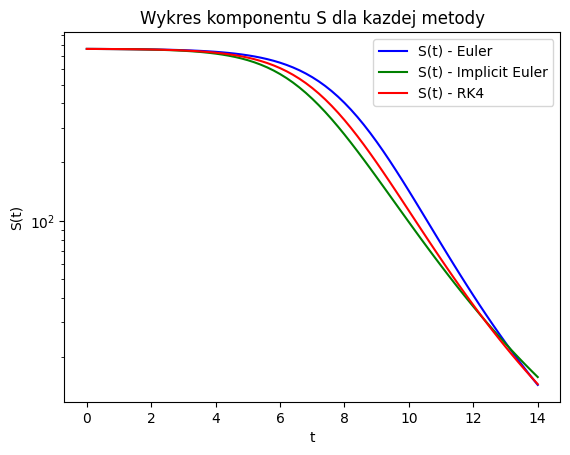

In [477]:
plt.title("Wykres komponentu S dla kazdej metody")
plt.plot(t_euler, y_euler[:, 0], 'b', label='S(t) - Euler')
plt.plot(t_implicit_euler, y_implicit_euler[:, 0], 'g', label='S(t) - Implicit Euler')
plt.plot(t_rk4, y_rk4[:, 0], 'r', label='S(t) - RK4')
plt.xlabel('t')
plt.ylabel('S(t)')
plt.yscale('log')
plt.legend()
plt.show()

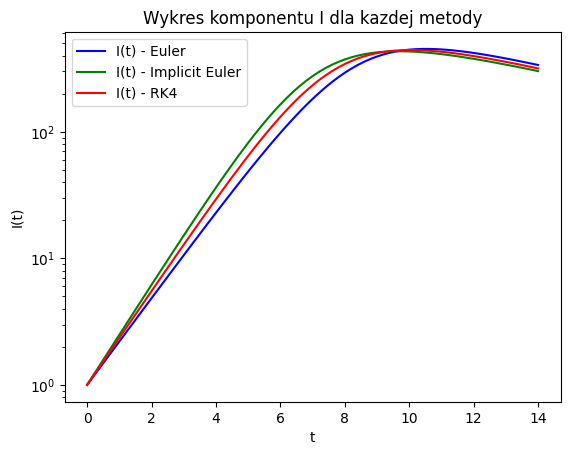

In [478]:
plt.title("Wykres komponentu I dla kazdej metody")
plt.plot(t_euler, y_euler[:, 1], 'b', label='I(t) - Euler')
plt.plot(t_implicit_euler, y_implicit_euler[:, 1], 'g', label='I(t) - Implicit Euler')
plt.plot(t_rk4, y_rk4[:, 1], 'r', label='I(t) - RK4')
plt.xlabel('t')
plt.ylabel('I(t)')
plt.yscale('log')
plt.legend()
plt.show()

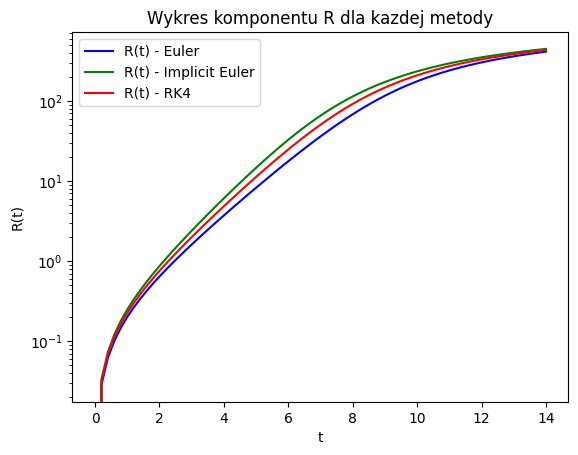

In [479]:
plt.title("Wykres komponentu R dla kazdej metody")
plt.plot(t_euler, y_euler[:, 2], 'b', label='R(t) - Euler')
plt.plot(t_implicit_euler, y_implicit_euler[:, 2], 'g', label='R(t) - Implicit Euler')
plt.plot(t_rk4, y_rk4[:, 2], 'r', label='R(t) - RK4')
plt.xlabel('t')
plt.ylabel('R(t)')
plt.yscale('log')
plt.legend()
plt.show()

### Wykres S(t) + I(t) + R(t) dla każdej metody

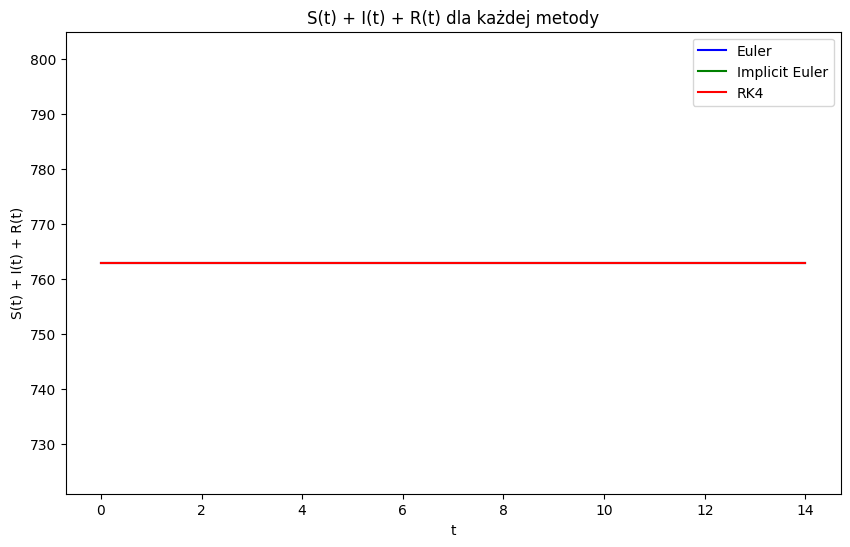

In [480]:
plt.figure(figsize=(10, 6))
plt.plot(t_euler, y_euler[:, 0] + y_euler[:, 1] + y_euler[:, 2], 'b', label='Euler')
plt.plot(t_implicit_euler, y_implicit_euler[:, 0] + y_implicit_euler[:, 1] + y_implicit_euler[:, 2], 'g', label='Implicit Euler')
plt.plot(t_rk4, y_rk4[:, 0] + y_rk4[:, 1] + y_rk4[:, 2], 'r', label='RK4')
plt.xlabel('t')
plt.ylabel('S(t) + I(t) + R(t)')
plt.legend()
plt.title('S(t) + I(t) + R(t) dla każdej metody')
plt.show()

### Prawdziwe dane zakażonych

In [481]:
true_infected = np.array([1, 3, 6, 25, 73, 222, 294, 258, 237, 191, 125, 69, 27, 11, 4])
days = np.arange(15)

### Funkcja kosztu - suma kwadratów reszt

In [482]:
def cost_function(params, t, true_infected):
    beta, gamma = params
    t_span = (0, 14)
    h = 1
    t_rk4, y_rk4 = rk4_method(sir_model, t_span, y0, h, beta, gamma)
    I_pred = y_rk4[:,1]
    solution = np.sum((np.array(true_infected) - I_pred) ** 2)
    return solution

### Funkcja kosztu - log-likelihood

In [483]:
def log_likelihood_function(params, t, true_infected):
    beta, gamma = params
    y0 = [S0, I0, R0]
    t_span = (0, 14)
    h = 1
    t_rk4, y_rk4 = rk4_method(sir_model, t_span, y0, h, beta, gamma)
    I_pred = y_rk4[:,1]
    solution = np.sum(-np.array(true_infected * np.log(I_pred)) + I_pred)
    return solution

### Minimalizacja funkcji kosztu - suma kwadratów reszt

In [484]:
options = {'maxiter': 200, 'maxfun': 300, 'disp': True}
initial_guess = [beta, gamma]

In [485]:
result = minimize(cost_function, initial_guess, args=(days, true_infected), method='Nelder-Mead', options=options)
beta_est, gamma_est = result.x
R0_est = beta_est / gamma_est
print(f"Estymowane wartości - suma kwadratów reszt: beta = {beta_est}, gamma = {gamma_est}, R0 = {R0_est}")

Optimization terminated successfully.
         Current function value: 4470.634230
         Iterations: 39
         Function evaluations: 76
Estymowane wartości - suma kwadratów reszt: beta = 1.6697415516194567, gamma = 0.44564002141982473, R0 = 3.7468393128148625


### Minimalizacja funkcji kosztu - log-likelihood

In [486]:
result_log_likelihood = minimize(log_likelihood_function, initial_guess, args=(days, true_infected), method='Nelder-Mead', options=options)
beta_est_log, gamma_est_log = result_log_likelihood.x
R0_est_log = beta_est_log / gamma_est_log
print(f"Estymowane wartości - log-likelihood: beta = {beta_est_log}, gamma = {gamma_est_log}, R0 = {R0_est_log}")

Optimization terminated successfully.
         Current function value: -6439.392452
         Iterations: 47
         Function evaluations: 88
Estymowane wartości - log-likelihood: beta = 1.69255947736147, gamma = 0.480862879543448, R0 = 3.5198380855857687
